The SIR model for disease is a simple mathematical model of disease propogation.

It is defined by three equations relating to three quantities, Susceptible, Infectious and Recovered (SIR), all of which are functions of time, hence we have functions $S(t)$, $I(t)$, $R(t)$.

## Susceptible

The number of susceptible people will decrease proportionally with the quantity of susceptible multiplied by the number of infectious people, since raising either of these will increase the number of cases.

Hence, 

### $\frac{dS}{dt} = - \frac{\beta}{N} S I$

Where we add $\beta$ as a proportionality constant, which we divide by population, N.

## Infectious

The number of infectious people will increase at the same rate that the rate of susceptible people decreases, except with a small rate of recovery where people are added to the recovered pool over time. This will be proportional to the number of infected people, and so we have $-\gamma I$ where $\gamma$ is a proportionality constant. Combining these two terms, we have,

### $\frac{dI}{dt} = \frac{\beta}{N} S I - \gamma I$


## Recovered

The number of recovered people will increase as people recover from the disease, as mentioned above, this is proportional to the number of infected people.

### $dR/dt = \gamma I$




In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Construct a function dAdt, which will calculate $dA/dt$, which is just a vector of $(dS/dt, dI/dt, dR/dt)$.

In [42]:
def  dAdt(A, t, beta, gamma, N):
    # A is just a vector of all the rates dS/dt, dI/dt, dR/dt.
    S, I, R = A
    return [
        -beta / N * S * I,
        beta / N * S * I - gamma * I,
        gamma * I
    ]


Set some initial conditions and the timescale.

In [43]:
# Population
N = 1e5
# Infection rate scaling factor
beta = 1
# Recovery rate scaling factor
gamma = 0.2

# Initial infected
I0 = 100 
# Initial susceptible
S0 = N - I0
# Initial recovered
R0 = 0

In [44]:
time = np.arange(0, 40)

In [45]:
result = odeint(dAdt, y0=[S0, I0, R0], t=time, args=(beta, gamma, N))

Text(0, 0.5, 'people (units)')

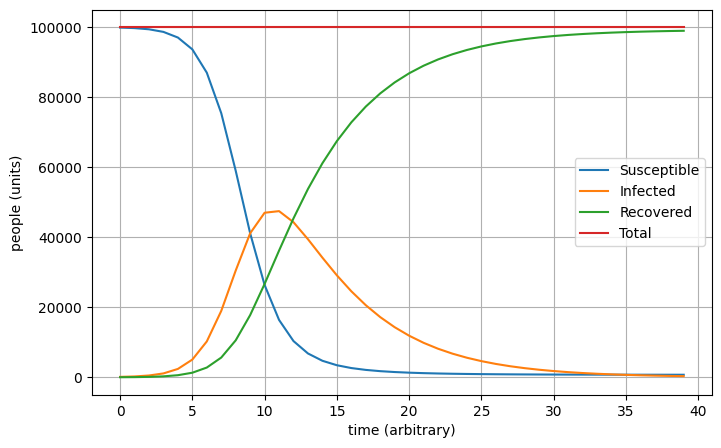

In [46]:
S = result[:, 0]
I = result[:, 1]
R = result[:, 2]
total = S + I + R

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(time, S, label='Susceptible')
plt.plot(time, I, label='Infected')
plt.plot(time, R, label='Recovered')
plt.plot(time, total, label='Total')
plt.legend()
plt.grid()
ax.set_xlabel('time (arbitrary)')
ax.set_ylabel('people (units)')